In [29]:
# 推定量の一致性と不偏性の確認
#
# 2015/06/01 ver1.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

%matplotlib inline

In [3]:
def draw_subplot(subplot, linex1, liney1, linex2, liney2, ylim):
    subplot.set_ylim(ylim)
    subplot.set_xlim(min(linex1), max(linex1)+1)
    subplot.scatter(linex1, liney1)
    subplot.plot(linex2, liney2, color='red', linewidth=4, label="mean")
    subplot.legend(loc=0)


In [4]:
mean_linex = []
mean_mu = []
mean_s2 = []
mean_u2 = []
raw_linex = []
raw_mu = []
raw_s2 = []
raw_u2 = []
for n in np.arange(2,51): # 観測データ数Nを変化させて実行
    for c in range(2000): # 特定のNについて2000回の推定を繰り返す
        ds = normal(loc=0, scale=1, size=n)
        raw_mu.append(np.mean(ds))
        raw_s2.append(np.var(ds))
        raw_u2.append(np.var(ds)*n/(n-1))
        raw_linex.append(n)
    mean_mu.append(np.mean(raw_mu)) # 標本平均の平均
    mean_s2.append(np.mean(raw_s2)) # 標本分散の平均
    mean_u2.append(np.mean(raw_u2)) # 不偏分散の平均
    mean_linex.append(n)

# プロットデータを40個に間引きする
raw_linex = raw_linex[0:-1:50]
raw_mu = raw_mu[0:-1:50]
raw_s2 = raw_s2[0:-1:50]
raw_u2 = raw_u2[0:-1:50]


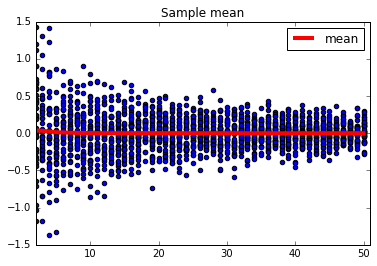

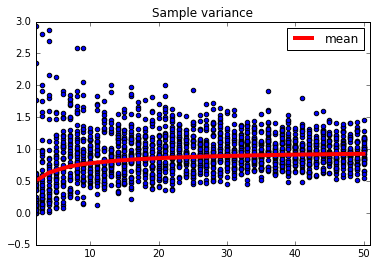

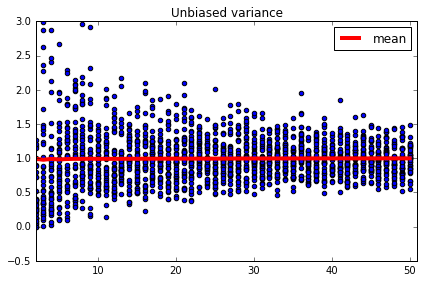

In [28]:
# 標本平均の結果表示
fig1 = plt.figure()
subplot = fig1.add_subplot(1,1,1)
subplot.set_title('Sample mean')
draw_subplot(subplot, raw_linex, raw_mu, mean_linex, mean_mu, (-1.5,1.5))

# 標本分散の結果表示
fig2 = plt.figure()
subplot = fig2.add_subplot(1,1,1)
subplot.set_title('Sample variance')
draw_subplot(subplot, raw_linex, raw_s2, mean_linex, mean_s2, (-0.5,3.0))

# 不偏分散の結果表示
fig3 = plt.figure()
subplot = fig3.add_subplot(1,1,1)
subplot.set_title('Unbiased variance')
draw_subplot(subplot, raw_linex, raw_u2, mean_linex, mean_u2, (-0.5,3.0))

plt.tight_layout()